<a href="https://colab.research.google.com/github/liao771018/Team-Project/blob/main/TeanProject_CNN_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from glob import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models, layers, losses, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare dataset

In [ ]:
# 模型要用的圖片大小
IMG_SIZE = 224

# 模型檔名
model_name = 'CNN_TP_4.h5'

# 模型存檔的位置
save_model_path = '/content/drive/MyDrive/12_團體專題_第四組/02_模型/01_CNN'

model_path = save_model_path + '/' + model_name

# 要分的類別
cls2idx = {'cuttlefish': 0, 'octopus': 1}

In [ ]:
# 讀取資料
img_dir = '/content/drive/MyDrive/12_團體專題_第四組/01_圖片資料/02_進模型的圖片'

# Read single image
train_paths = glob(img_dir + '/train/*')
test_paths = glob(img_dir + '/test/*')

print('訓練資料筆數:', len(train_paths))
print('測試資料筆數:', len(test_paths))

訓練資料筆數: 1933
測試資料筆數: 238


/content/drive/MyDrive/12_團體專題_第四組/01_圖片資料/02_進模型的圖片/train/octopus_crawler_01526.jpg
shape: (453, 805, 3)
resize: (224, 224, 3)
class: octopus
label: 1


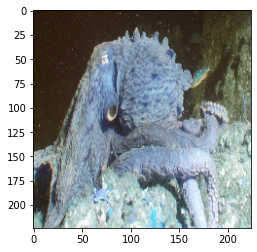

In [ ]:
# 拿一張出來看看
# show image
idx = np.random.randint(0, len(train_paths))

img = cv2.imread(train_paths[idx])
img_resize = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

# Resize img
cls = train_paths[idx].split('/')[-1].split('_')[0]
label = cls2idx[cls]

print(train_paths[idx])
print('shape:', img.shape)
print('resize:', img_resize.shape)
print('class:', cls)
print('label:', label)
plt.imshow(img_resize)

# Read all images

In [ ]:
# 訓練資料筆數
data_count = len(train_paths)

# 做一個全為 0 的 np.array 來放 preprocess 後的資料
x = np.zeros((data_count, IMG_SIZE, IMG_SIZE, 3))
y = np.zeros((data_count, ))

In [ ]:
for i, path in enumerate(tqdm(train_paths)):

    img = cv2.imread(path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    cls = path.split('/')[-1].split('_')[0]
    label = cls2idx[cls]

    img = img / 255.0 # normalization
        
    x[i] = img
    y[i] = label

  0%|          | 0/1933 [00:00<?, ?it/s]

In [ ]:
# 看一下 label 跟 count
unique_classes, counts = np.unique(y, return_counts=True)
unique_classes, counts

(array([0., 1.]), array([966, 967]))

In [ ]:
# split train and validation dataset
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=5566)

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((1739, 224, 224, 3), (1739,), (194, 224, 224, 3), (194,))

In [ ]:
y_train

array([1., 1., 1., ..., 0., 1., 0.])

In [ ]:
x_train[0]

array([[[0.48235294, 0.56862745, 0.58823529],
        [0.52941176, 0.58039216, 0.58431373],
        [0.49803922, 0.50196078, 0.4627451 ],
        ...,
        [0.14901961, 0.38039216, 0.43921569],
        [0.23137255, 0.4627451 , 0.48235294],
        [0.34117647, 0.54117647, 0.51372549]],

       [[0.47058824, 0.58039216, 0.59607843],
        [0.54117647, 0.61176471, 0.61176471],
        [0.56862745, 0.6       , 0.55294118],
        ...,
        [0.21960784, 0.43137255, 0.49411765],
        [0.29803922, 0.5254902 , 0.54901961],
        [0.35294118, 0.56470588, 0.5372549 ]],

       [[0.50980392, 0.64705882, 0.65882353],
        [0.50196078, 0.6       , 0.6       ],
        [0.49019608, 0.54509804, 0.50588235],
        ...,
        [0.30980392, 0.48627451, 0.55686275],
        [0.27058824, 0.48235294, 0.51372549],
        [0.31372549, 0.51764706, 0.48235294]],

       ...,

       [[0.14117647, 0.35294118, 0.33333333],
        [0.25098039, 0.4627451 , 0.44705882],
        [0.28235294, 0

#Build Model

In [ ]:
from tensorflow.keras import layers
# 建立模型架構

layers = [
      layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
      # layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),

      layers.Conv2D(128, 3, padding='same', activation='relu'),
      # layers.Conv2D(128, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),

      layers.Conv2D(256, 3, padding='same', activation='relu'),
      layers.Conv2D(256, 3, padding='same', activation='relu'),
      # layers.Conv2D(256, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),

      # layers.Conv2D(512, 3, padding='same', activation='relu'),
      # layers.Conv2D(512, 3, padding='same', activation='relu'),
      # layers.Conv2D(512, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),

      layers.GlobalAveragePooling2D(),
      # layers.Flatten(),
      # layers.Dense(512, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(2, activation='softmax')

]

model = models.Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 56, 56, 256)       295168    
                                                                 
 conv2d_13 (Conv2D)          (None, 56, 56, 256)      

In [ ]:
# 選擇損失函數
model.compile( loss=losses.SparseCategoricalCrossentropy(),
        optimizer='adam',
        metrics=['accuracy']
)

#Training

In [ ]:
callbacks = [
             callbacks.ModelCheckpoint(model_path, save_best_only=True),
             callbacks.EarlyStopping(patience=10, restore_best_weights=True)
]

model.fit(x_train, y_train,
          batch_size=20,
          epochs=50,
          validation_data=(x_val, y_val),
          callbacks=callbacks
          )
# 7/13 best val_loss: 0.2624 - val_accuracy: 0.9021 (2層 Conv, units=256)
# 7/13 best val_loss: 0.6936 - val_accuracy: 0.4691 (3層 Conv, units=512)
# 7/13 best val_loss: 0.2260 - val_accuracy: 0.8969 (2層 Conv, units=256, 1層 Conv, units=64, 1層 Conv, units=128)

Epoch 1/50
87/87 [==============================] - 11s 119ms/step - loss: 0.6853 - accuracy: 0.5279 - val_loss: 0.6848 - val_accuracy: 0.5567
Epoch 2/50
87/87 [==============================] - 10s 114ms/step - loss: 0.6613 - accuracy: 0.6153 - val_loss: 0.6653 - val_accuracy: 0.6186
Epoch 3/50
87/87 [==============================] - 10s 115ms/step - loss: 0.6349 - accuracy: 0.6366 - val_loss: 0.6583 - val_accuracy: 0.5825
Epoch 4/50
87/87 [==============================] - 10s 117ms/step - loss: 0.6083 - accuracy: 0.6636 - val_loss: 0.6257 - val_accuracy: 0.6495
Epoch 5/50
87/87 [==============================] - 10s 117ms/step - loss: 0.5887 - accuracy: 0.6901 - val_loss: 0.6236 - val_accuracy: 0.6753
Epoch 6/50
87/87 [==============================] - 10s 119ms/step - loss: 0.5871 - accuracy: 0.6947 - val_loss: 0.6165 - val_accuracy: 0.6701
Epoch 7/50
87/87 [==============================] - 10s 118ms/step - loss: 0.5682 - accuracy: 0.7073 - val_loss: 0.5631 - val_accuracy: 0.7113

# Metrics

In [ ]:
data_count = len(test_paths)

x_test = np.zeros((data_count, IMG_SIZE, IMG_SIZE, 3))
x_test_ori = np.zeros((data_count, IMG_SIZE, IMG_SIZE, 3))
y_test = np.zeros((data_count,))

In [ ]:
for i, path in enumerate(tqdm(test_paths)):

  img = cv2.imread(path)
  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
  img_ori = img.copy()
  img = img / 255.0

  cls = path.split('/')[-1].split('_')[0]
  label = cls2idx[cls]

  x_test[i] = img
  x_test_ori[i] = img_ori
  y_test[i] = label


  0%|          | 0/238 [00:00<?, ?it/s]

In [ ]:
# model = models.load_model(model_path)
model.evaluate(x_test, y_test)
# 7/13 best loss: 0.3326 - accuracy: 0.8824 (2層 Conv, units=256)
# 7/13 best loss: 0.1824 - accuracy: 0.9118 (2層 Conv, units=256, 1層 Conv, units=64, 1層 Conv, units=128)

8/8 [==============================] - 1s 54ms/step - loss: 0.1824 - accuracy: 0.9118


[0.18238788843154907, 0.9117646813392639]

In [ ]:
# 混淆矩陣

pre = model.predict(x_test).argmax(axis=-1)
mat = confusion_matrix(y_test, pre)

pd.DataFrame(mat,
       columns=['{}預測'.format(i) for i in cls2idx],
       index=['{}真實'.format(i) for i in cls2idx])


,cuttlefish預測,octopus預測
cuttlefish真實,103,12
octopus真實,9,114


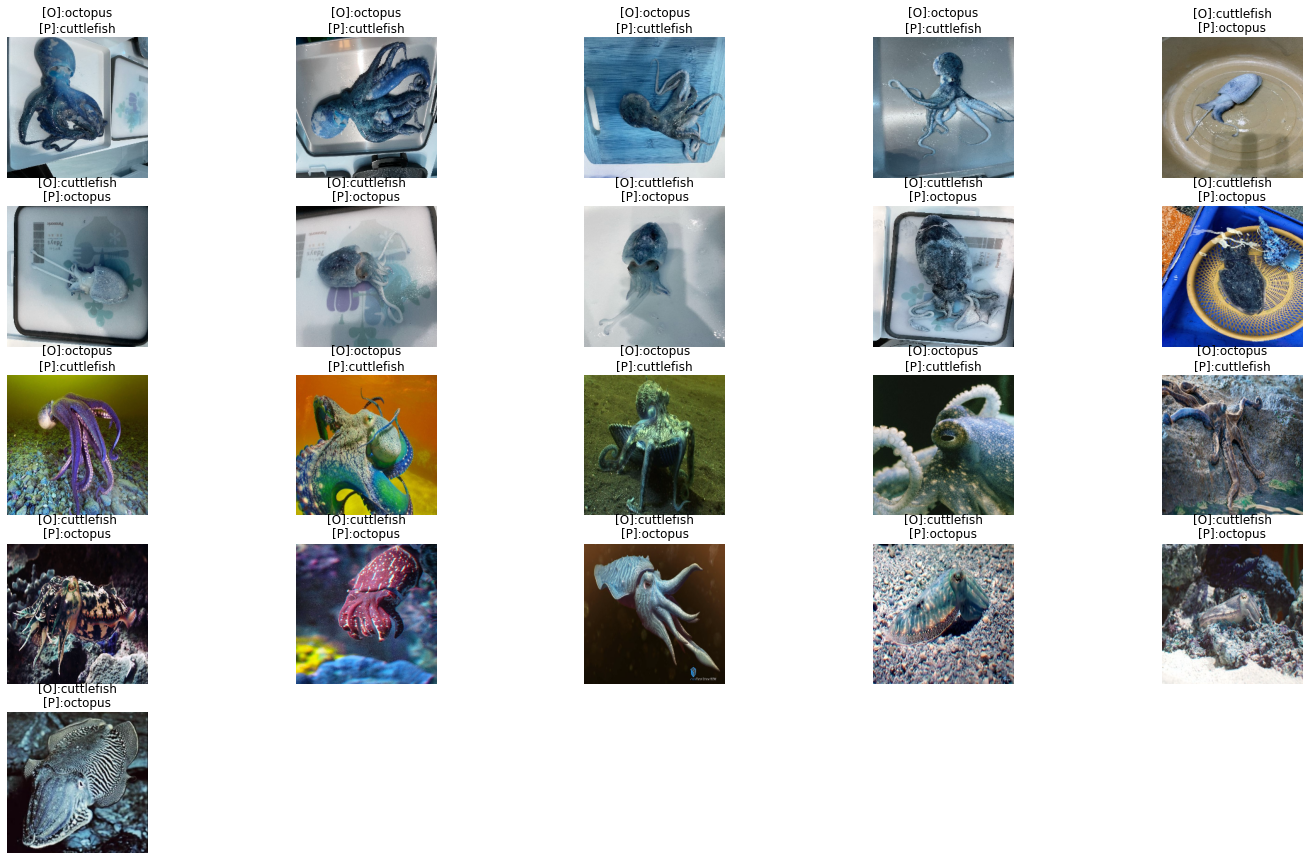

In [ ]:
# 預測錯誤的 index
idx = np.nonzero(pre != y_test)[0]

# 預測錯誤的 圖 正確值 與 預測值
pre_false_img = x_test_ori[idx]
pre_false_label = y_test[idx]
pre_false_pred = pre[idx]

# 設定圖的大小
plt.figure(figsize=(25,15))
width = 5
height = len(idx) // width + 1

idx2cls = {v: k for k, v in cls2idx.items()}

# 印出來看一下預測錯誤的圖
for i in range(len(idx)):

    plt.subplot(height, width, i+1)

    t = "[O]:{}\n[P]:{}".format(idx2cls[pre_false_label[i]], idx2cls[pre_false_pred[i]])
    plt.title(t)

    plt.axis("off")
    plt.imshow(pre_false_img[i].astype(int))

# 實際預測